# Avaliação

1. Crie uma função que recebe uma lista e retorna o valor máximo e mínimo da lista (não utilize a função max() e min()).
2. Crie uma função que recebe dois parâmetros (início e fim) e retorna uma lista com todos os valores pares entre ínicio e fim.
3. Acesse a nota de matemática em dc3 e altere para 3.

Para as questões 4 a 8 utilize o dataset 'water_potability.csv'. O dataset descreve características de uma amostra de água e na coluna 'potability' descreve se a água é ou não própria para consumo humano. Para iniciar a resolução das questões abaixo drope a coluna 'Unnamed: 0'.

4. Demonstre a correlação entre todas as colunas do dataset. Qual é a coluna com maior correlação positiva com 'potability'? Desconsidere a correlação com ela mesma (valor 1.0).
5. Crie uma série que descreve (em porcentagem) quanto cada coluna tem de valores nulos. Qual a coluna com maior porcentagem de valores nulos?
6. Crie uma coluna dentro do dataset que descreve se 'Turbidity' está acima ou abaixo da média.
7. Quantas amostras de água são potáveis e não potáveis, utilize a coluna criada na questão 6 como dimensão de análise.
8. Crie um dataframe onde o índice deve ser cada estado e com duas colunas. A primeira é a porcentagem de amostras não potáveis naquele estado e a segunda é a porcentagem de amostras potáveis naquele estado. Qual é o estado com a menor porcentagem de amostras de água potável?
9. Utlizando dados coletados da internet sobre a quantidade de habitantes de cada estado no ano 2020 responda. Qual estado, com populacao acima de 10 milhões de habitantes, tem a maior porcentagem de amostras de águas não potável?
10. Crie o dicionário dc_states contendo como chaves os nomes de cada estado e como valor uma lista contendo o zscore aplicado a coluna "Solids" de todas as amostras daquele respectivo estado. Passe para função violin_plot_states o dicionário e uma lista contendo 5 estados que gostaria de análisar. Faça uma análise sucinta do resultado do gráfico.

In [4]:
dc3 = { 
   "turma":{ 
      "aluno":{ 
         "nome":"Joao",
         "notas":{ 
            "portugues":2,
            "matematica":9
         }
      }
   }
}

import matplotlib.pyplot as plt
import seaborn as sns

def violin_plot_states(dc_states,lista_estados):
    f, ax = plt.subplots(1,1,figsize=(16,4))
    data_plot = pd.DataFrame.from_dict(dc_states,orient='index').T.melt().rename(columns={'variable':'state','value':'z_score'})
    states_plot = lista_estados
    sns.violinplot(x='state',y='z_score',data=data_plot[data_plot.state.isin(states_plot)])    
    ax.axhline(0,color='black',alpha=0.3)

## Crie uma função que recebe uma lista e retorna o valor máximo e mínimo da lista (não utilize a função max() e min()).

In [1]:
def min_max(lst):
    nmin = 10000000
    nmax = 0
    for n in lst:
        nmin = n if nmin > n else nmin
        nmax = n if nmax < n else nmax
        
    return nmin, nmax

In [6]:
lst_mm = [-10, -9, -5 ,-2 ,-3, -1 , 0, 25, 10]

minimo, maximo = min_max(lst_mm)

print(f'mínimo: {minimo} | máximo: {maximo}')

mínimo: -10 | máximo: 25


## Crie uma função que recebe dois parâmetros (início e fim) e retorna uma lista com todos os valores pares entre ínicio e fim.

In [14]:
def inicio_fim(ini:int, fim:int)->list:
    start = ini if ini % 2 == 0 else ini+1
    return [_  for _ in range(start, fim, 2)] if fim > ini else 'o segundo parametro precisa ser maior que o primeiro'

In [20]:
inicio_fim(0,20)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

## Acesse a nota de matemática em dc3 e altere para 3.

In [27]:
dc3['turma']['aluno']['notas']['matematica'] = 3
print(dc3['turma']['aluno']['notas'])

{'portugues': 2, 'matematica': 3}


Para as questões 4 a 8 utilize o dataset 'water_potability.csv'. O dataset descreve características de uma amostra de água e na coluna 'potability' descreve se a água é ou não própria para consumo humano. Para iniciar a resolução das questões abaixo drope a coluna 'Unnamed: 0'.

## Demonstre a correlação entre todas as colunas do dataset. Qual é a coluna com maior correlação positiva com 'potability'? Desconsidere a correlação com ela mesma (valor 1.0).

In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('water_potability.csv', sep=';', index_col=0)
df.head(3)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,state,sample_id
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,Pennsylvania,4b4962b9-fed5-492e-9d28-50d954937c3f
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0,Iowa,f1099b93-9195-4bd5-90b7-f0c191a74619
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0,Wisconsin,5bc660ce-c94c-4631-b69b-b937be4ab7bb


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3276 entries, 0 to 3275
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
 10  state            3276 non-null   object 
 11  sample_id        3276 non-null   object 
dtypes: float64(9), int64(1), object(2)
memory usage: 332.7+ KB


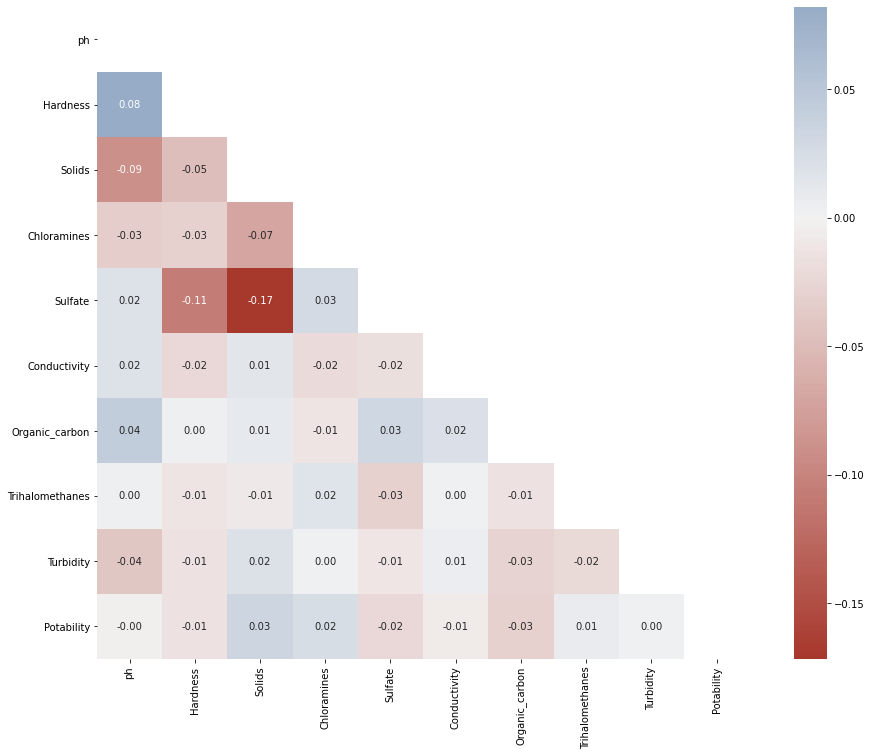

In [7]:
matriz = df.corr()
mask = np.triu(np.ones_like(matriz, dtype=bool))

cmap = sns.diverging_palette(15, 250, s=75, l=40,
                             n=9, center="light", as_cmap=True)

plt.figure(figsize=(16, 12))

sns.heatmap(matriz, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap)

plt.show();

**Resposta:** A coluna com maior correlação positiva com 'Potability' é a coluna 'Solids' => 0.03

## Crie uma série que descreve (em porcentagem) quanto cada coluna tem de valores nulos. Qual a coluna com maior porcentagem de valores nulos?

In [59]:
missing = round((df.isnull().sum() / len(df)) * 100, 2)

display(missing.sort_values(ascending=False))

Sulfate            23.84
ph                 14.99
Trihalomethanes     4.95
Hardness            0.00
Solids              0.00
Chloramines         0.00
Conductivity        0.00
Organic_carbon      0.00
Turbidity           0.00
Potability          0.00
state               0.00
sample_id           0.00
dtype: float64

**Resposta:** A coluna com maior porcentagem de valores nulos é a coluna 'Sulfate' => 23,84%

## Crie uma coluna dentro do dataset que descreve se 'Turbidity' está acima ou abaixo da média.

In [9]:
t_media = df['Turbidity'].mean()
df['turbidity_limiar'] = np.select([df['Turbidity'] > t_media, df['Turbidity'] < t_media], ['above average', 'below average'], default='on average')
df.sample(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,state,sample_id,turbidity_limiar
1031,5.375896,153.712874,56867.859236,7.894086,NaN,493.888464,15.116023,57.712992,4.174220,0,Montana,3eb80478-de5c-4f32-8277-d294d236fe06,above average
2476,5.045626,179.702503,22557.603596,10.120334,296.425154,450.295696,14.215817,82.066334,3.331787,0,New York,068c4d2b-d172-464b-b2a1-997a19ecbfb7,below average
1874,6.203323,214.850111,29426.473780,8.034868,369.726683,319.766681,10.247863,65.308637,3.487920,0,Rhode Island,9492df60-7a1d-469a-b2b9-acce398b82a3,below average
725,10.268431,218.216682,13753.993373,7.512608,334.178075,341.602209,15.671564,84.682660,4.304689,1,Maryland,b0e495e4-319d-454b-8922-964064311e92,above average
2624,NaN,227.432663,32102.190705,3.646848,321.671073,433.276491,11.690091,57.049690,3.581037,0,Utah,405c86f0-f54a-4686-9777-9b23158d845f,below average
1697,6.356511,164.618185,17538.541172,8.345192,345.144958,430.959505,15.329438,47.021382,3.415526,0,Rhode Island,740ef0b9-ca4f-4de0-b3b4-1bba3f1f4e21,below average
2233,NaN,196.082967,22746.061659,7.702740,325.478423,397.054983,21.091602,51.939019,3.713110,0,Mississippi,5fdfa6f9-ae40-465b-8d7d-3aecc6b2eff1,below average
1876,8.373171,179.521406,22022.626217,5.215042,339.492222,396.696697,13.697087,110.431080,2.786330,0,Iowa,21f9fcb7-1cd1-41ba-bbbf-5e4092e5e6b9,below average
441,6.529304,210.004033,28970.087606,4.250151,NaN,422.817556,7.091298,83.690156,3.361088,0,South Dakota,c55b7d84-3ec7-4848-b3e1-d7d578f83831,below average
363,4.812434,250.183954,11465.575643,4.362641,398.161904,607.026542,18.210032,62.511467,3.020996,1,Idaho,aa28d4f4-2b6d-4253-9cea-0f258a66739e,below average


## Quantas amostras de água são potáveis e não potáveis, utilize a coluna criada na questão 6 como dimensão de análise.

In [13]:
df['turbidity_limiar'].value_counts()

below average    1660
above average    1616
Name: turbidity_limiar, dtype: int64

**Resposta:** Amostras potáveis: 1616 | Amostras não potáveis: 1660

## Crie um dataframe onde o índice deve ser cada estado e com duas colunas. A primeira é a porcentagem de amostras não potáveis naquele estado e a segunda é a porcentagem de amostras potáveis naquele estado. Qual é o estado com a menor porcentagem de amostras de água potável?

In [14]:
def fpct_potable(series, p=True):
    pct_p = round((series.sum() / series.count())* 100, 2)
    return pct_p if p else 100 - pct_p
        
# ------------- uma forma de fazer -------------
# df_pct = df.groupby('state').agg(
#     pct_unpotable = pd.NamedAgg(column='Potability', aggfunc=lambda x: fpct_potable(x, p=False)),
#     pct_potable = pd.NamedAgg(column='Potability', aggfunc=lambda x: fpct_potable(x))    
# ).sort_values(by='pct_potable')

# ------------- outra forma de fazer -------------
df_pct = df.groupby('state')['Potability'].agg(
    pct_unpotable=lambda x: fpct_potable(x, p=False),
    pct_potable = lambda x: fpct_potable(x)
).sort_values(by='pct_potable')

display(df_pct)

,pct_unpotable,pct_potable
state,,
Minnesota,78.33,21.67
Vermont,71.23,28.77
Ohio,70.49,29.51
New York,70.15,29.85
Virginia,70.00,30.00
South Dakota,69.12,30.88
Rhode Island,66.67,33.33
Maryland,66.67,33.33
Iowa,66.67,33.33


**Resposta:** O estado com a menor porcentagem de amostras de água potável é 'Minnesota' => 21,67%

## Utlizando dados coletados da internet sobre a quantidade de habitantes de cada estado no ano 2020 responda. Qual estado, com populacao acima de 10 milhões de habitantes, tem a maior porcentagem de amostras de águas não potável?

In [122]:
df_pop_states = pd.read_html('https://en.wikipedia.org/wiki/2020_United_States_census')[2]
df_pop_states.head(3)

,Rank,State,Population as of2010 census[80],Population as of2020 census[81],Change,Percentchange
0,1,California,37253956,39538223,2284267,6.13%
1,2,Texas,25145561,29145505,3999944,15.91%
2,3,Florida,18801310,21538187,2736877,14.56%


In [124]:
# alterando o nome das colunas
df_pop_states = df_pop_states[['State', 'Population as of2020 census[81]']]
df_pop_states.columns = ['state', 'pop2020']

In [127]:
df_pop_states.tail()

,state,pop2020
47,Alaska,733391
48,District of Columbia,689545
49,Vermont,643077
50,Wyoming,576851
51,United States,331449281


In [130]:
# retirando a linha de Total
df_pop_states = df_pop_states.iloc[:-1]

In [134]:
df_pop_states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   state    51 non-null     object
 1   pop2020  51 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 944.0+ bytes


In [140]:
(
df_pop_states.set_index('state')
.join(df_pct)
.query('pop2020 > 10000000')
).nlargest(1,'pct_unpotable')

,pop2020,pct_unpotable,pct_potable
state,,,
Ohio,11799448,70.49,29.51


**Resposta:** O estado com populacao acima de 10 milhões de habitantes, que tem a maior porcentagem de amostras de águas não potável é 'Ohio' => 70,49%

## Crie o dicionário dc_states contendo como chaves os nomes de cada estado e como valor uma lista contendo o zscore aplicado a coluna "Solids" de todas as amostras daquele respectivo estado. Passe para função violin_plot_states o dicionário e uma lista contendo 5 estados que gostaria de análisar. Faça uma análise sucinta do resultado do gráfico.

In [151]:
dc_states = {}
for state in df_pct.index:
    media = df.loc[df['state']== state]['Solids'].mean()
    dp = df.loc[df['state']== state]['Solids'].std()
    dc_states[state] = [(X-media)/dp for X in df.loc[df['state']== state]['Solids'].values]


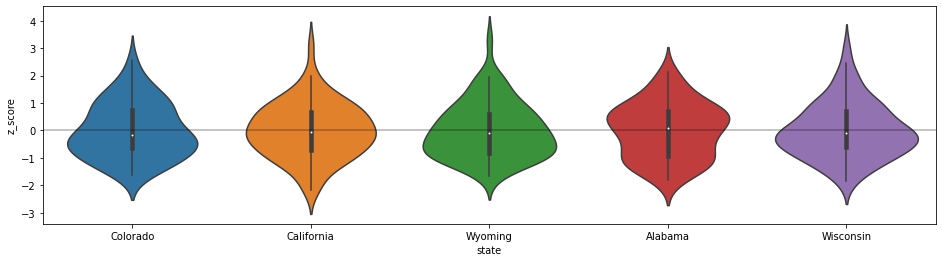

In [153]:
violin_plot_states(dc_states, ['Wyoming', 'California', 'Wisconsin', 'Alabama', 'Colorado'])

**Resposta:** Sabendo que o `z-score` é o número de desvios padrão em relação à média de um ponto de informação, podemos observar para:
- **Colorado**: A maior frequência de z-scores da coluna `'Solids'` concentra-se na região correspondente a -0,5 desvio padrão sobre a média de `'Solids'` daquele estado, sinalizando que os dados de 'Solids' estão concentrados levemente abaixo de sua média. Observa-se que o pico de densidade de z-scores de Colorado assemelha-se ao de **Wyoming** e **Wisconsin**, sendo que este último possui o pico de densidade levemente maior, na região -0,3 desvios padrão sobre a média.
- **California**: Possui maior densidade de z-scores para `'Solids'` próximo a zero desvios padrão sobre a média, aproximadamente o valor de sua mediana (pontinho branco no centro do gráfico). Isso signifia que para California os dados de Solid aproximam-se de uma distribuição normal
- **Alabama**: Seu gráfico indica que a maior parte dos valores de `'Solid'` concentram-se acima de sua média, aproximadamente +0,5 desvio padrão. Também existe uma parte considerável afastada da média em -1 desvio padrão. Sua mediana, por consequência, fica bem próximo de zero.